# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

In [1]:
N = 9
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Exercise_Hours'

Считываем из файла необходимые для варианта 9 данные из столбца **'Exercise_Hours'**


In [2]:
import csv

data = []

with open('teen_phone_addiction_dataset.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(float(row['Exercise_Hours'])) 

for i in range(10):
    print(data[i])
len(data)

0.1
0.0
0.8
1.6
1.1
0.7
0.9
2.2
1.8
1.1


3000

Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

In [3]:
import numpy as np
#1
def calculate_mean(data):
    mean = sum(data) / len(data)
    return mean

#2
def calculate_variance(data):
    mean = calculate_mean(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    return variance

#3
def calculate_mode(data):
    frequency = {}
    for x in data:
        frequency[x] = frequency.get(x, 0) + 1

    max_count = max(frequency.values())
    modes = [x for x, count in frequency.items()if count == max_count]
    return modes
#4
def calculate_median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)    
    
    if n % 2 == 1:
        return sorted_data[n // 2]
    else:
        return (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2

#5
def calculate_quantile(data, p):

    sorted_data = sorted(data)
    n = len(sorted_data)
    
    position = (n - 1) * p
    lower_index = int(position)
    upper_index = min(lower_index + 1, n - 1)
    weight = position - lower_index
    
    return sorted_data[lower_index] * (1 - weight) + sorted_data[upper_index] * weight

#6
def calculate_kurtosis(data):
    mean = calculate_mean(data)
    n = len(data)
    m4 = sum((x - mean) ** 4 for x in data) / n
    deviation = np.sqrt(calculate_variance(data))
    return m4/(deviation**4) - 3

#7

def calculate_skewness(data):
    mean = calculate_mean(data)
    n = len(data)
    
    m3 = sum((x - mean) ** 3 for x in data) / n
    deviation = np.sqrt(calculate_variance(data))
    
    skewness = m3 /(deviation**3) 
    
    return skewness

#8

def calculate_iqr(data):
    q1 = calculate_quantile(data, 0.25)
    q3 = calculate_quantile(data, 0.75)
    return q3 - q1

In [4]:
print(f'1. Mean: {calculate_mean(data)}\n'
      f'2. Variance: {calculate_variance(data)}\n'
      f'3. Mode: {calculate_mode(data)}\n'
      f'4. Median {calculate_median(data)}\n'
      f'5.1 Quantile 0.25: {calculate_quantile(data, 0.25)}\n'
      f'5.2 Quantile 0.50: {calculate_quantile(data, 0.50)}\n'
      f'5.3 Quantile 0.75: {calculate_quantile(data, 0.75)}\n'
      f'6. Kurtosis: {calculate_kurtosis(data)}\n'
      f'7. Skewness: {calculate_skewness(data)}\n'
      f'8. IQR: {calculate_iqr(data)}')

1. Mean: 1.0406666666666666
2. Variance: 0.5394862222222222
3. Mode: [0.0]
4. Median 1.0
5.1 Quantile 0.25: 0.5
5.2 Quantile 0.50: 1.0
5.3 Quantile 0.75: 1.5
6. Kurtosis: -0.25905838838224904
7. Skewness: 0.4384191527891889
8. IQR: 1.0


Построить графики:

Гистограмма
Эмпирическая функция распределения

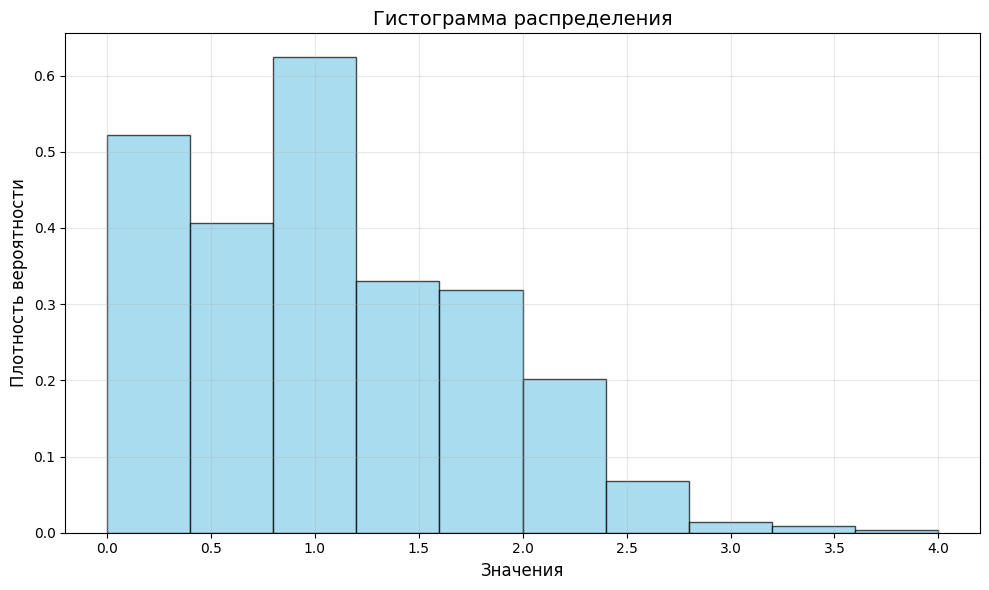

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(data, bins=10, title="Гистограмма распределения"):

    plt.figure(figsize=(10, 6))
    
    n, bins, patches = plt.hist(data, bins=bins, alpha=0.7, color='skyblue', 
                               edgecolor='black', density=True)
    
    plt.title(title, fontsize=14)
    plt.xlabel('Значения', fontsize=12)
    plt.ylabel('Плотность вероятности', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    #return n, bins

plot_histogram(data)


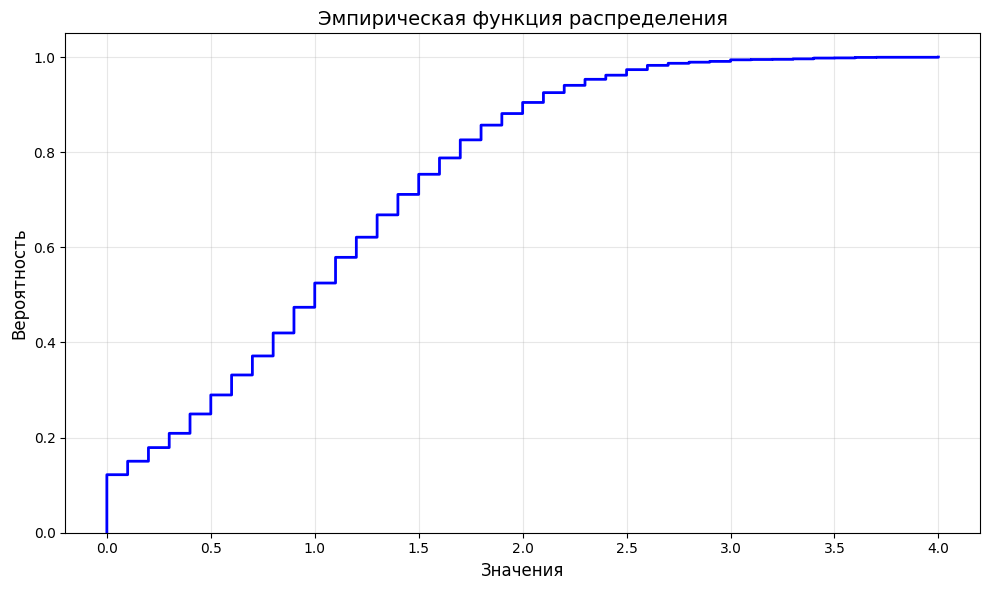

In [6]:
def plot_ecdf(data, title="Эмпирическая функция распределения"):

    plt.figure(figsize=(10, 6))
    
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    
    plt.step(x, y, where='post', color='blue', linewidth=2)
    
    plt.title(title, fontsize=14)
    plt.xlabel('Значения', fontsize=12)
    plt.ylabel('Вероятность', fontsize=12)
    plt.grid(alpha=0.3)
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.show()
    
    #return x, y

plot_ecdf(data)

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

In [7]:
import numpy as np
import scipy.stats as stats

def chi_square_normality_test(data, alpha=0.05):
    n = len(data)

    mu = calculate_mean(data)
    sigma = np.std(data, ddof=1)

    # Правило Стерджеса
    k = int(1 + np.log2(n))

    bins = np.linspace(np.min(data), np.max(data), k + 1)

    observed, _ = np.histogram(data, bins)

    cdf = stats.norm.cdf(bins, loc=mu, scale=sigma)

    expected = n * np.diff(cdf)

    chi2_stat = np.sum((observed - expected) ** 2 / expected)

    # Степени свободы = число интервалов - 1 - число оценённых параметров (mu, sigma)
    df = k - 1 - 2

    # Критическое значение
    chi2_crit = stats.chi2.ppf(1 - alpha, df)

    return {
        "chi2_stat": chi2_stat,
        "chi2_crit": chi2_crit,
        "df": df,
        "p_value": 1 - stats.chi2.cdf(chi2_stat, df),
        "H0_normal": chi2_stat < chi2_crit
    }


def skewness_kurtosis_test(data, alpha=0.05):

    n = len(data)

    mean, std = calculate_mean(data), np.std(data, ddof=1)

    skew = calculate_skewness(data)
    kurt = calculate_kurtosis(data)
    
    # Стандартные ошибки
    se_skew = np.sqrt(6 / n)
    se_kurt = np.sqrt(24 / n)

    z_skew = skew / se_skew
    z_kurt = kurt / se_kurt

    # Проверка гипотезы (двусторонний критерий)
    z_crit = stats.norm.ppf(1 - alpha / 2)

    return {
        "skew": skew,
        "kurtosis": kurt,
        "z_skew": z_skew,
        "z_kurt": z_kurt,
        "z_crit": z_crit,
        "H0_normal": (abs(z_skew) < z_crit) and (abs(z_kurt) < z_crit)
    }

def print_test_results(title, results):
    print(f"\n{title}")
    print("-" * len(title))
    for key, value in results.items():
        print(f"{key:12} : {value:.4f}" if isinstance(value, float) else f"{key:12} : {value}")


In [8]:
print_test_results("Chi test", chi_square_normality_test(data))
print_test_results("Skewness kurtosis test", skewness_kurtosis_test(data))


Chi test
--------
chi2_stat    : 570.0734
chi2_crit    : 16.9190
df           : 9
p_value      : 0.0000
H0_normal    : False

Skewness kurtosis test
----------------------
skew         : 0.4384
kurtosis     : -0.2591
z_skew       : 9.8034
z_kurt       : -2.8964
z_crit       : 1.9600
H0_normal    : False


P value равное 0 показывает что распределение явно не нормальное.
z_skew  и z_kurt значительно отличаются от +-1.96, что тоже указывает на то что распределение не нормальное.

In [9]:
def qq_plot(data, dist="norm", loc=None, scale=None, ax=None):
    data = np.asarray(data)
    n = len(data)

    probs = (np.arange(1, n + 1) - 0.5) / n
    empirical_quants = [calculate_quantile(data, p) for p in probs]

    if loc is None:
        loc = calculate_mean(data)
    if scale is None:
        scale = np.std(data, ddof=1)

    theoretical_quants = stats.__dict__[dist].ppf(probs, loc=loc, scale=scale)

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))

    ax.scatter(theoretical_quants, empirical_quants, color="blue", label="Данные")
    ax.plot(theoretical_quants, theoretical_quants, "r--", label="Идеальная линия")
    ax.set_xlabel("Теоретические квантили")
    ax.set_ylabel("Эмпирические квантили")
    ax.set_title(f"Q-Q plot ({dist})")
    ax.legend()
    ax.grid(True)

    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)


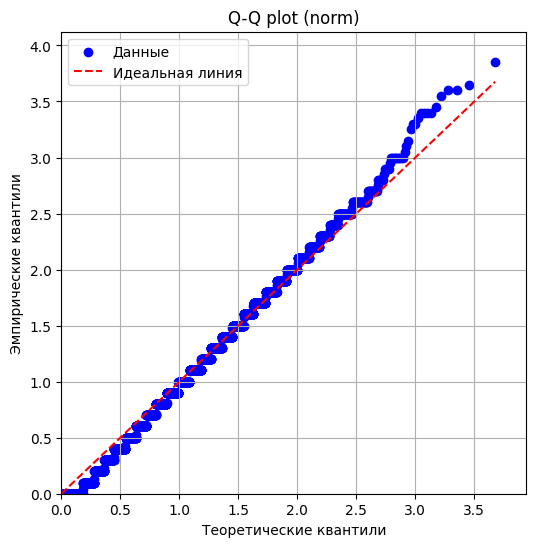

In [10]:
qq_plot(data)
plt.show()

> * В левой части графика точки находятся ниже идеальной линии <br>
> * В правой части точки находятся выше идеальной линии <br>

Форма отклонения указывает на то, что распределение либо имеет более тяжелые хвосты (тяжелее, чем у нормального распределения), или скошено в определенную сторону

 <b>Тем самым, можно утвердиться в том что данные распределены не нормально</b>

## III. 
## Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
> * 1. Удаление, усечение выбросов
> * 2. Стандартизация, нормировка
> * 3. Логарифмирование и т.п.

In [31]:
# удаление выбросов
def remove_outilers(data):
    q1 = calculate_quantile(data, 0.25)
    q3 = calculate_quantile(data, 0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    trim = [item for item in data if item >= lower and item <= upper]
    return trim

trim = remove_outilers(data)
print(f'{len(data)-len(trim)} выбросов')

17 выбросов


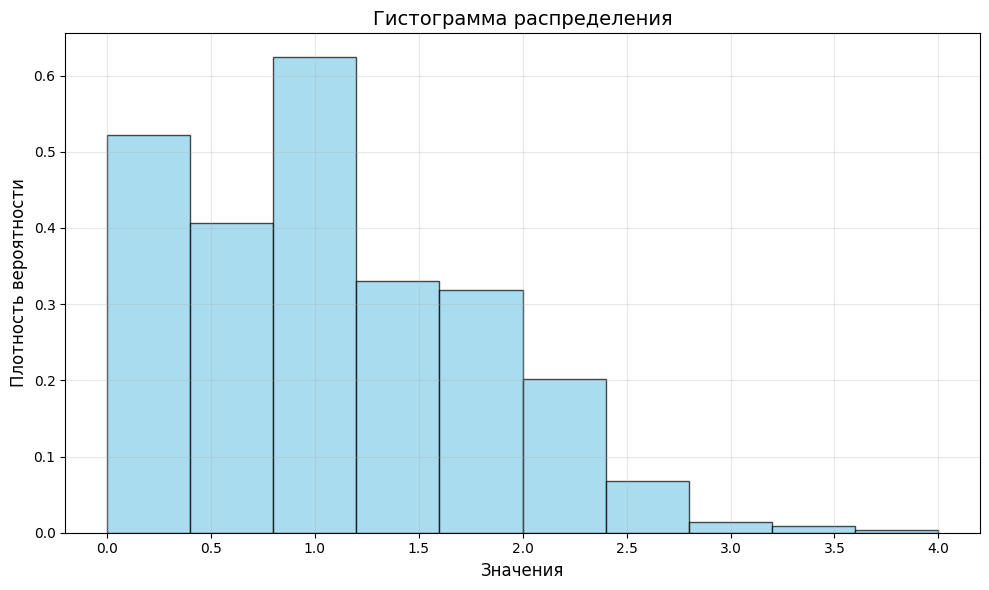

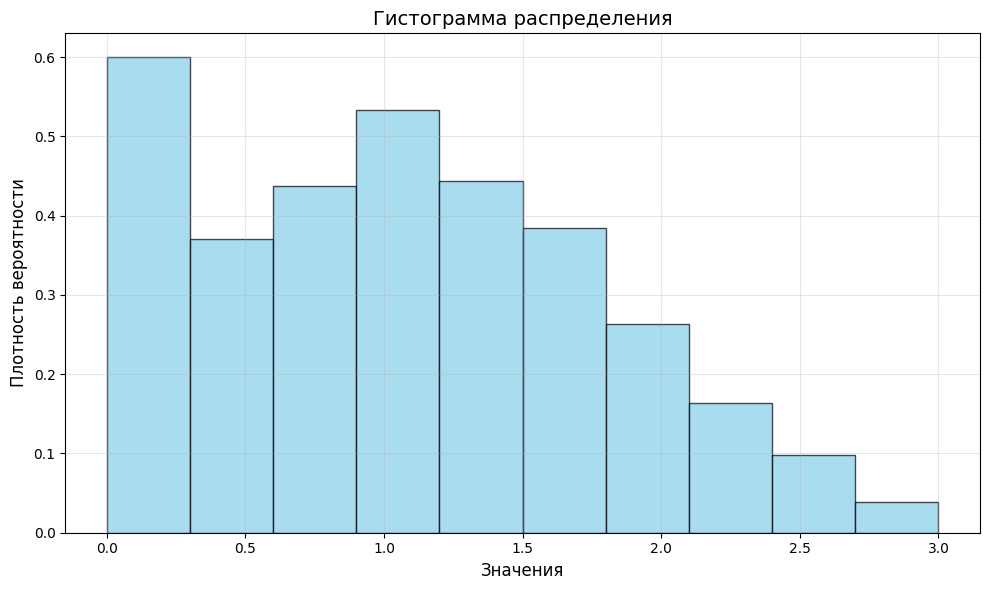

In [32]:
plot_histogram(data)
plot_histogram(trim)

# Удаление выбросов уменьшило хвост

In [33]:
print_test_results("Chi test", chi_square_normality_test(trim))
print_test_results("Skewness kurtosis test", skewness_kurtosis_test(trim))


Chi test
--------
chi2_stat    : 800.2295
chi2_crit    : 16.9190
df           : 9
p_value      : 0.0000
H0_normal    : False

Skewness kurtosis test
----------------------
skew         : 0.3185
kurtosis     : -0.6407
z_skew       : 7.1009
z_kurt       : -7.1431
z_crit       : 1.9600
H0_normal    : False


# Удаление выбросов не привело распределение к нормальному, попробуем другие способы

In [34]:
trim = np.array(trim)

standardized = (trim - calculate_mean(trim)) / np.sqrt(calculate_variance(trim))
#plot_histogram(standardized)

#print_test_results("Chi test", chi_square_normality_test(standardized))
#print_test_results("Skewness kurtosis test", skewness_kurtosis_test(standardized))

normalized = (trim - np.min(trim)) / (np.max(trim) - np.min(trim))

#plot_histogram(normalized)


print_test_results("Chi test", chi_square_normality_test(normalized))
print_test_results("Skewness kurtosis test", skewness_kurtosis_test(normalized))


Chi test
--------
chi2_stat    : 800.2295
chi2_crit    : 16.9190
df           : 9
p_value      : 0.0000
H0_normal    : False

Skewness kurtosis test
----------------------
skew         : 0.3185
kurtosis     : -0.6407
z_skew       : 7.1009
z_kurt       : -7.1431
z_crit       : 1.9600
H0_normal    : False


## Стандартизация и нормализация не меняют форму распределения, поэтому не могут привести его к нормальному. Попробуем логорифмирование

In [41]:
if (trim <= 0).any():
    shift = abs(trim.min()) + 1e-6
else:
    shift = 0
logged = np.log(trim + shift)

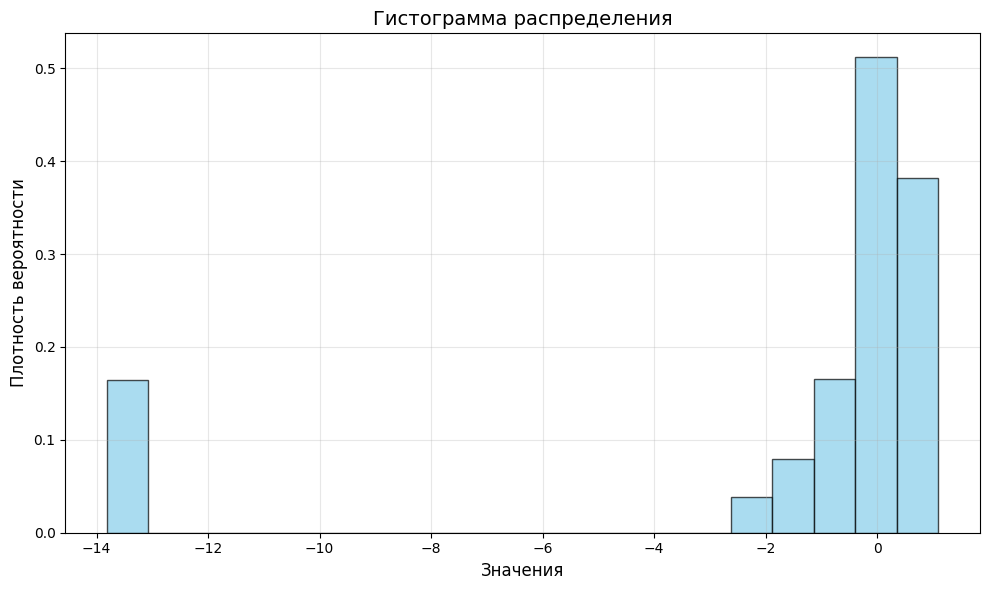

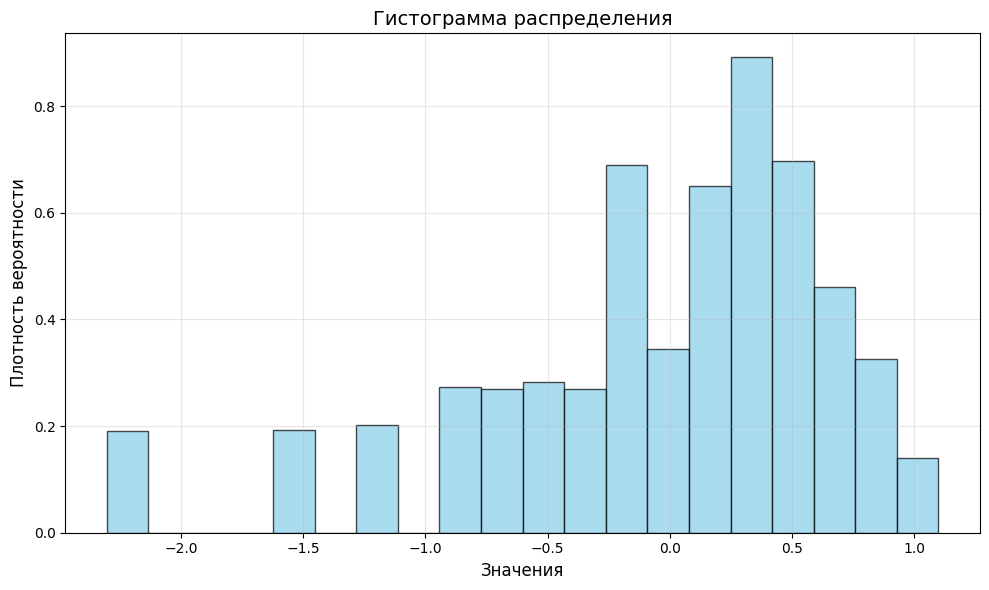


Chi test
--------
chi2_stat    : 1349.5622
chi2_crit    : 16.9190
df           : 9
p_value      : 0.0000
H0_normal    : False

Skewness kurtosis test
----------------------
skew         : -1.1608
kurtosis     : 1.2092
z_skew       : -24.2428
z_kurt       : 12.6271
z_crit       : 1.9600
H0_normal    : False


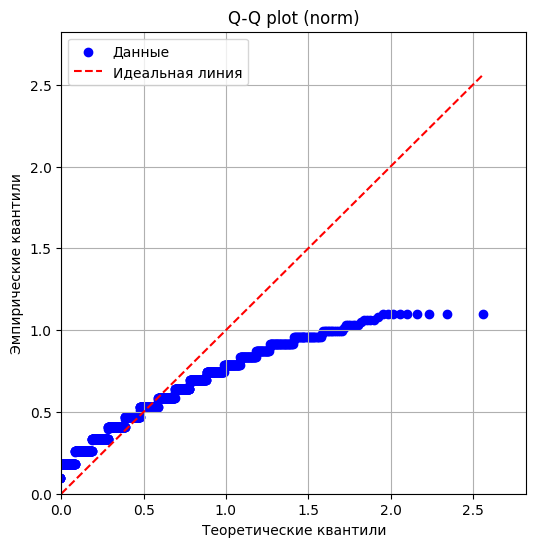

In [47]:
plot_histogram(logged, bins = 20)
trim_logged = remove_outilers(logged)
plot_histogram(trim_logged, bins = 20)
qq_plot(trim_logged)
print_test_results("Chi test", chi_square_normality_test(trim_logged))
print_test_results("Skewness kurtosis test", skewness_kurtosis_test(trim_logged))

# К сожалению, распределение не получилось привести к нормальному.

In [46]:
#plot_histogram(trim, bins=20)


## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

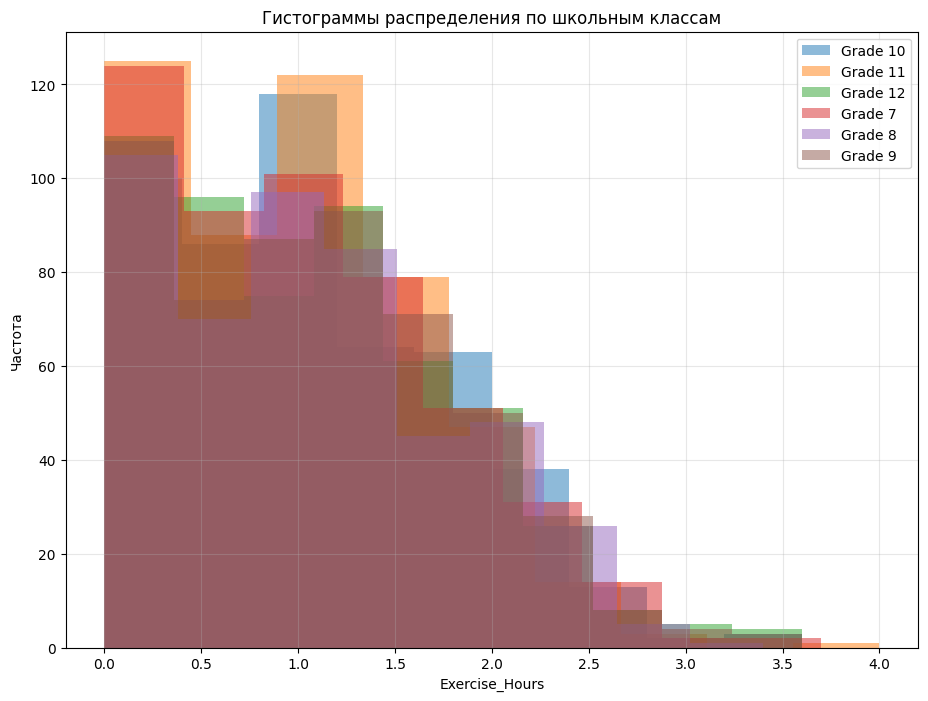

Статистики по группам:
                mean     var  count
School_Grade                       
10th          1.0425  0.5365    487
11th          0.9795  0.4867    479
12th          1.0459  0.5642    529
7th           1.0296  0.5324    497
8th           1.0620  0.5517    482
9th           1.0802  0.5617    526


In [52]:
import pandas as pd

df = pd.read_csv('teen_phone_addiction_dataset.csv')

grouped = df.groupby('School_Grade')

plt.figure(figsize=(11, 8))
for grade, subset in grouped:
    k = 1 + int(np.log2(len(subset))) 
    plt.hist(subset['Exercise_Hours'], bins=k, alpha=0.5, label=f"Grade {grade.removesuffix('th')}")

plt.xlabel('Exercise_Hours')
plt.ylabel("Частота")
plt.title("Гистограммы распределения по школьным классам")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

stats_by_grade = grouped['Exercise_Hours'].agg(['mean', 'var', 'count']).round(4)
print("Статистики по группам:")
print(stats_by_grade)

Исходя из полученных статистик по группам можно предположить, что данные приходят из похожих распределений. Только в 11 классе имеется аномалия в виде 4.0 часов занятий, что искажает среднее значение и дисперсию, но в общем среднее значение времени проводимого за занятиями не разнится между учениками различных классов